In [1]:
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt

In [7]:
os.listdir("raw-img/")

['gallina',
 'ragno',
 '.DS_Store',
 'gatto',
 'farfalla',
 'mucca',
 'cavallo',
 'cane',
 'pecora',
 'scoiattolo',
 'elefante']

In [2]:
imgnames=os.listdir("raw-img/cane")[:100]

In [3]:
data=[]
for i in imgnames:
    data.append(cv2.imread("raw-img/cane/"+i))

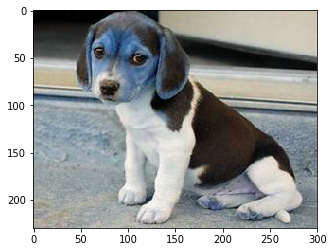

In [167]:
plt.imshow(data[3])

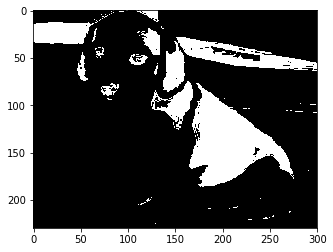

In [168]:
# mask is not used 
maskInput = cv2.inRange(data[3],(0, 0, 10),(255, 255,55))
maskInput=cv2.cvtColor(maskInput,cv2.COLOR_GRAY2BGR)
plt.imshow(maskInput)

In [28]:
dataresized=[]
dim=(64,64)
for i in range(len(data)):
    dataresized.append(cv2.cvtColor(cv2.resize(data[i],dim,interpolation = cv2.INTER_AREA),cv2.COLOR_BGR2GRAY))
    

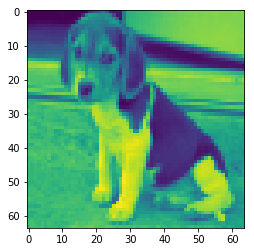

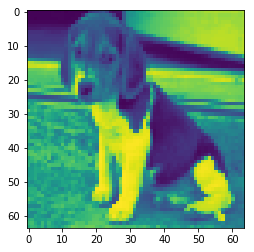

In [59]:
plt.imshow(dataresized[3])
plt.show()
plt.imshow(cv2.equalizeHist(dataresized[3]))

In [33]:
dataresized[0]

array([[ 57,  58,  55, ...,  69,  68,  66],
       [ 57,  56,  59, ...,  70,  68,  68],
       [ 56,  60,  62, ...,  74,  73,  72],
       ...,
       [146, 146, 147, ..., 175, 174, 175],
       [147, 147, 148, ..., 174, 173, 174],
       [147, 149, 149, ..., 176, 175, 176]], dtype=uint8)

In [169]:
bluredimg=cv2.GaussianBlur(dataresized[3],(5,5),0)
hequalized=cv2.equalizeHist(bluredimg)
tresh=cv2.adaptiveThreshold(hequalized,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,3)

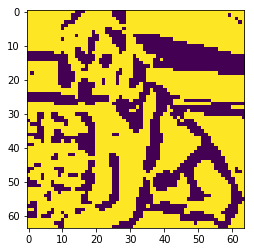

In [170]:
plt.imshow(tresh)

In [12]:
def process(f,dim=(64,64)): 
    imgnames=os.listdir("raw-img/"+f)[:100]
    data=[]
    for i in imgnames:
        data.append(cv2.imread("raw-img/"+f+"/"+i))
        dataresized=[]
        final=[]
    for i in range(len(data)):
        dataresized.append(cv2.cvtColor(cv2.resize(data[i],dim,interpolation = cv2.INTER_AREA),cv2.COLOR_BGR2GRAY))
    for i in range(len(dataresized)):
        bluredimg=cv2.GaussianBlur(dataresized[i],(5,5),0)
        hequalized=cv2.equalizeHist(bluredimg)
        tresh=cv2.adaptiveThreshold(hequalized,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,3)
        final.append(tresh)
   
    os.mkdir("raw-img/"+str(dim[0])+"/"+f+"-processed")
    for i in range(len(final)):
        cv2.imwrite("raw-img/"+str(dim[0])+"/"+f+"-processed/"+str(i)+".jpg",final[i])

In [14]:
dim=(256,256)
os.mkdir("raw-img/"+str(dim[0]))
process("cane",dim)
process("cavallo",dim)
process("elefante",dim)
process("mucca",dim)

In [3]:
dim=(12,12)

In [5]:
dim[0]

12